In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("collegePlace.csv")

In [3]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
df.shape

(2966, 8)

In [5]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [7]:
df.drop(['Age','Hostel'], axis=1,inplace=True)

In [8]:
df['Stream'].value_counts()

Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64

In [9]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [10]:
df2=df.replace(['Electronics And Communication','Computer Science','Information Technology','Mechanical','Electrical','Civil'],[0,1,2,3,4,5])



In [11]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
df3=df2.replace(['Male','Female'],[0,1])

In [13]:
df3.head()

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,0,0,1,8,1,1
1,1,1,0,7,1,1
2,1,2,1,6,0,1
3,0,2,0,8,1,1
4,0,3,0,8,0,1


In [14]:
df.describe()

,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000
mean,0.703641,7.073837,0.192178,0.552596
std,0.740197,0.967748,0.394079,0.497310
min,0.000000,5.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,1.000000
75%,1.000000,8.000000,0.000000,1.000000
max,3.000000,9.000000,1.000000,1.000000


In [15]:
df3.columns

Index(['Gender', 'Stream', 'Internships', 'CGPA', 'HistoryOfBacklogs',
       'PlacedOrNot'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Male      2475
Female     491
Name: Gender, dtype: int64

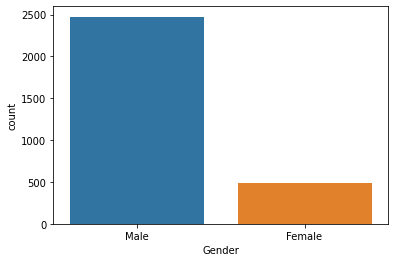

In [16]:
sns.countplot('Gender',data=df)
df['Gender'].value_counts()

In [17]:
df3['HistoryOfBacklogs'].value_counts()

0    2396
1     570
Name: HistoryOfBacklogs, dtype: int64

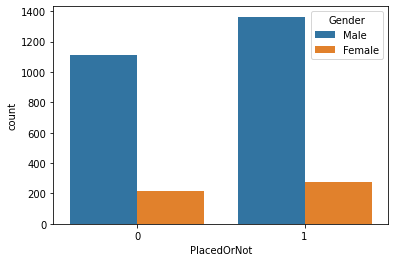

In [18]:
sns.countplot(x='PlacedOrNot', hue='Gender', data=df)

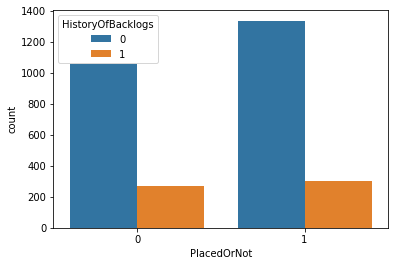

In [19]:
sns.countplot(x='PlacedOrNot', hue='HistoryOfBacklogs', data=df)

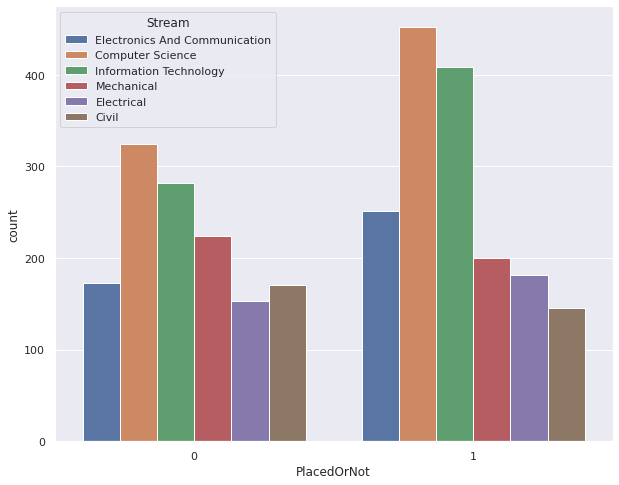

In [20]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.countplot(x='PlacedOrNot', hue='Stream',data=df)

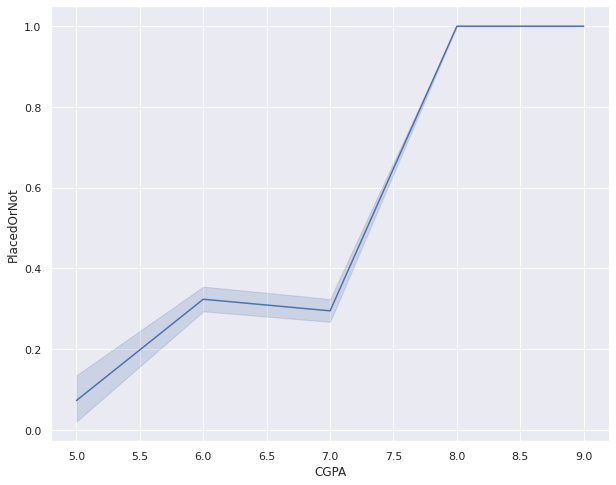

In [21]:
sns.lineplot(x='CGPA',y='PlacedOrNot',data=df)

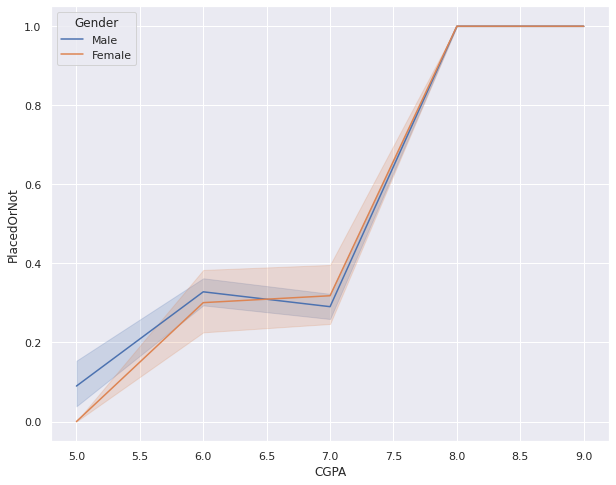

In [22]:
sns.lineplot(x='CGPA',y='PlacedOrNot',hue="Gender",data=df)

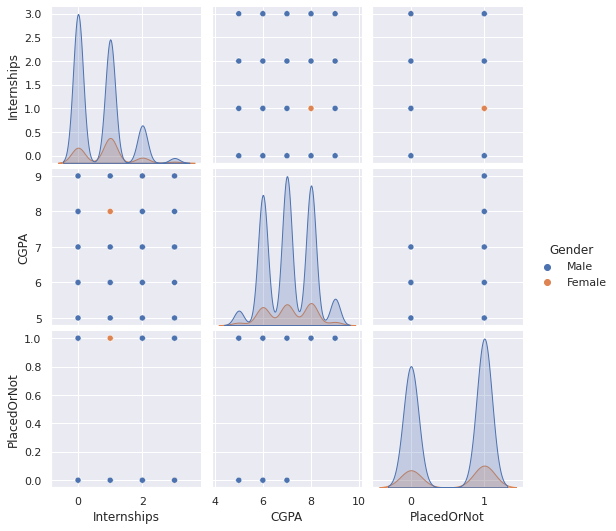

In [23]:
sns.pairplot(df,vars=["Internships","CGPA","PlacedOrNot"],hue="Gender")

In [24]:

df[df['CGPA']>8]['PlacedOrNot'].value_counts()


1    165
Name: PlacedOrNot, dtype: int64

In [25]:
x = df3.drop('PlacedOrNot', 1)
y = df3.PlacedOrNot

<ipython-input-25-a8822d637dfa>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df3.drop('PlacedOrNot', 1)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=2)

In [27]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = lr_model.predict(X_test)

y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,

In [29]:
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()

,Actual value,Predicted value
1430,1,1
1276,0,0
1340,0,1
1937,1,1
1893,0,0


In [30]:
from sklearn import metrics 
from sklearn.metrics import classification_report


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       266
           1       0.79      0.80      0.80       328

    accuracy                           0.77       594
   macro avg       0.77      0.77      0.77       594
weighted avg       0.77      0.77      0.77       594



In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7727272727272727

In [33]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [34]:
y_pred= classifier.predict(X_test)  

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8383838383838383

In [36]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='gini', random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=0)

In [37]:
y_pred= classifier.predict(X_test)  

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8383838383838383

In [44]:
import pickle
filename = "my_model.pickle"
pickle.dump(classifier, open(filename, "wb"))
loaded_model= pickle.load(open(filename, "rb"))  


In [88]:
loaded_model.predict(X_test)

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [97]:
[X_test.iloc[0]]

[Gender               1
 Stream               0
 Internships          2
 CGPA                 7
 HistoryOfBacklogs    0
 Name: 1430, dtype: int64]

In [104]:
loaded_model.predict([X_test.iloc[1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [83]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 50, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [102]:
y_pred= classifier.predict(X_test)  

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8383838383838383